Test that convex approximation of the energy is always hypograph of the actual energy function

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import polyphase 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb

In [67]:
#f = phase.polynomial_energy

#f = lambda x : polyphase.flory_huggins(x, [5,5,1],[1,0.5,0.5])

f = lambda x : polyphase.flory_huggins(x, [1626, 12.4, 1],[0.44,1.48,1.9], logapprox=True)
# Acetone	PC61BM	MDMO-PPV

#f = lambda x : polyphase.flory_huggins(x, [1,1,1],[3.1,3.1,3.1], logapprox=True)

# def f(x):    
#     scales = [10,20,400]
#     e =0
#     for si,xi in zip(scales, x):
#         e += si*((xi-0.1)**2)*((0.9-xi)**2)

#     return e

In [66]:
hte = pd.read_pickle('../data/htev2.pkl')
import pdb

def get_energy_func(polymer, sm, solvent):
    criteria = (hte['SM']==sm)&(hte['polymer']==polymer)&(hte['solvent']==solvent)
    sys = hte[criteria]
    M = sys['dop'].to_list()[0]
    chi = sys.loc[:,['chi12', 'chi13', 'chi23']].values.squeeze().tolist()

    f = lambda x: polyphase.flory_huggins(x , M, chi, beta=0.0, logapprox=True)
    print(sys)
    return f

#f = get_energy_func(sm = 'Y6', polymer = 'PTB7-Th', solvent = 'Toluene')
#f = get_energy_func(sm = 'IDTBR', polymer = 'P3HT', solvent = 'Chloroform')


      solvent  SM  polymer    chi12    chi13     chi23  \
3557  Toluene  Y6  PTB7-Th  0.51461  0.45059  0.826191   

                                             dop        delta_solv  \
3557  [469.0431519699813, 13.621013133208256, 1]  [18.0, 1.4, 2.0]   

                 delta_SM       delta_polymer  
3557  [19.98, 3.72, 3.44]  [18.56, 2.3, 3.21]  


In [68]:
engine = polyphase.PHASE(f,200,3)
engine.compute(use_parallel=False, verbose=True, lift_label=True, correction='edge')

3-dimensional grid generated at 0.29s
Energy computed at 3.38s
Making energy manifold a paraboloid with 2x padding of 0.13 maximum energy
Energy is corrected at 5.53s
Convexhull is computed at 5.54s
Simplices are refined at 5.55s
Total of 109 simplices in the convex hull
Using 1.01E-01 as a threshold for Laplacian of a simplex
Simplices are labelled at 5.60s
Labels are lifted at 5.80s
Total 0/109 coplanar simplices
Computation took 5.80s


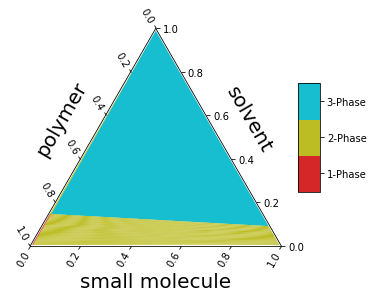

In [69]:
polyphase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.show()

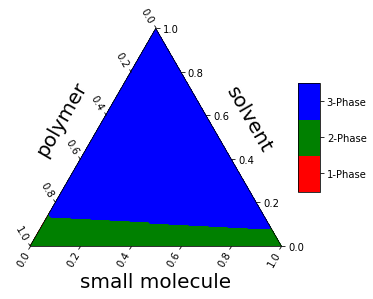

In [70]:
polyphase.plot_lifted_label_ternary(engine.df)
plt.show()

In [54]:
x = engine.energy
x[np.isclose(x, 200, atol=1e-1)]

array([], dtype=float64)

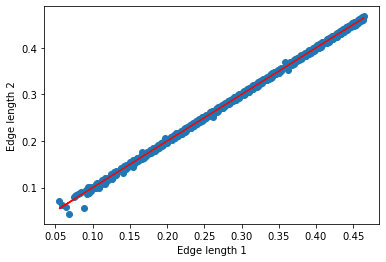

0/316 simplices failed the test


In [31]:
PHASE_ID = 2
phase_simplices_ids = np.where(np.asarray(engine.num_comps)==PHASE_ID)[0]
failed = []
fig, ax = plt.subplots()
criteria = engine.df.T['label']==PHASE_ID
lengths = []
for simplex_id in phase_simplices_ids:
    test = polyphase.TestPhaseSplits(engine,phase=PHASE_ID,simplex_id=simplex_id, threshold=0.05)
    test.check_centroid()
    _, a,b = test._min_edge_lengths_equal()
    lengths.append([a,b])
lengths = np.asarray(lengths)
ax.scatter(lengths[:,0], lengths[:,1])
ax.plot(lengths[:,0], lengths[:,0],color='red')
ax.set_xlabel('Edge length 1')
ax.set_ylabel('Edge length 2')
plt.show()
print('{}/{} simplices failed the test'.format(len(failed), len(phase_simplices_ids)))        